In [1]:
#importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
from fredapi import Fred

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

fred_key = '2a19b70c190cd833e8f4d034f4d067ed'

In [2]:
#create fred object

fred = Fred(api_key=fred_key)

#search data

sp_search = fred.search('S&P', order_by = 'popularity')
sp_search.head()

id realtime_start realtime_end  \
series id                                                    
BAMLH0A0HYM2      BAMLH0A0HYM2     2023-03-07   2023-03-07   
CSUSHPINSA          CSUSHPINSA     2023-03-07   2023-03-07   
BAMLH0A0HYM2EY  BAMLH0A0HYM2EY     2023-03-07   2023-03-07   
SP500                    SP500     2023-03-07   2023-03-07   
CSUSHPISA            CSUSHPISA     2023-03-07   2023-03-07   

                                                            title  \
series id                                                           
BAMLH0A0HYM2    ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA        S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY       ICE BofA US High Yield Index Effective Yield   
SP500                                                     S&P 500   
CSUSHPISA         S&P/Case-Shiller U.S. National Home Price Index   

               observation_start observation_end     frequency  \
series id                                                        
BAMLH0A0HYM2          1996-12-31      2023-03-06  Daily, Close   
CSUSHPINSA            1987-01-01      2022-12-01       Monthly   
BAMLH0A0HYM2EY        1996-12-31      2023-03-06  Daily, Close   
SP500                 2013-03-08      2023-03-07  Daily, Close   
CSUSHPISA             1987-01-01      2022-12-01       Monthly   

               frequency_short               units         units_short  \
series id                                                                
BAMLH0A0HYM2                 D             Percent                   %   
CSUSHPINSA                   M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY               D             Percent                   %   
SP500                        D               Index               Index   
CSUSHPISA                    M  Index Jan 2000=100  Index Jan 2000=100   

                    seasonal_adjustment seasonal_adjustment_short  \
series id                                                           
BAMLH0A0HYM2    Not Seasonally Adjusted                       NSA   
CSUSHPINSA      Not Seasonally Adjusted                       NSA   
BAMLH0A0HYM2EY  Not Seasonally Adjusted                       NSA   
SP500           Not Seasonally Adjusted                       NSA   
CSUSHPISA           Seasonally Adjusted                        SA   

                             last_updated popularity  \
series id                                              
BAMLH0A0HYM2    2023-03-07 09:29:11-06:00         94   
CSUSHPINSA      2023-02-28 08:02:02-06:00         92   
BAMLH0A0HYM2EY  2023-03-07 09:28:07-06:00         84   
SP500           2023-03-07 19:10:55-06:00         84   
CSUSHPISA       2023-02-28 08:02:04-06:00         82   

                                                            notes  
series id                                                          
BAMLH0A0HYM2    The ICE BofA Option-Adjusted Spreads (OASs) ar...  
CSUSHPINSA      For more information regarding the index, plea...  
BAMLH0A0HYM2EY  This data represents the effective yield of th...  
SP500           The observations for the S&P 500 represent the...  
CSUSHPISA       For more information regarding the index, plea...

<AxesSubplot:title={'center':'S&P 500'}>

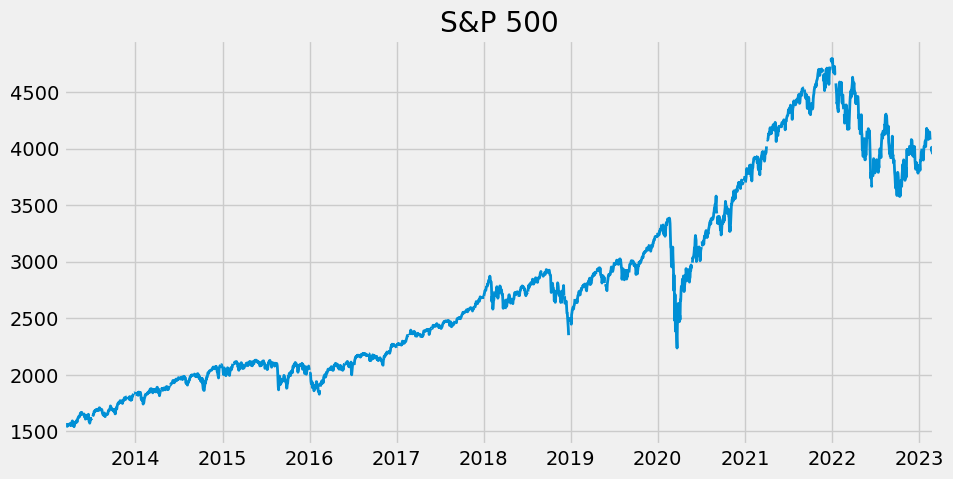

In [3]:
#pull raw data & plot

sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

In [4]:
#pull and join

unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate in')]
unemp_df

id realtime_start realtime_end  \
series id                                                                
CAUR                                  CAUR     2023-03-07   2023-03-07   
FLUR                                  FLUR     2023-03-07   2023-03-07   
TXUR                                  TXUR     2023-03-07   2023-03-07   
NYUR                                  NYUR     2023-03-07   2023-03-07   
PAUR                                  PAUR     2023-03-07   2023-03-07   
OHUR                                  OHUR     2023-03-07   2023-03-07   
NCUR                                  NCUR     2023-03-07   2023-03-07   
ALUR                                  ALUR     2023-03-07   2023-03-07   
MIUR                                  MIUR     2023-03-07   2023-03-07   
ILUR                                  ILUR     2023-03-07   2023-03-07   
MNUR                                  MNUR     2023-03-07   2023-03-07   
KYUR                                  KYUR     2023-03-07   2023-03-07   
GAUR                                  GAUR     2023-03-07   2023-03-07   
COUR                                  COUR     2023-03-07   2023-03-07   
NJUR                                  NJUR     2023-03-07   2023-03-07   
TNUR                                  TNUR     2023-03-07   2023-03-07   
WIUR                                  WIUR     2023-03-07   2023-03-07   
MAUR                                  MAUR     2023-03-07   2023-03-07   
MOUR                                  MOUR     2023-03-07   2023-03-07   
VAUR                                  VAUR     2023-03-07   2023-03-07   
SCUR                                  SCUR     2023-03-07   2023-03-07   
AZUR                                  AZUR     2023-03-07   2023-03-07   
INUR                                  INUR     2023-03-07   2023-03-07   
NMUR                                  NMUR     2023-03-07   2023-03-07   
ORUR                                  ORUR     2023-03-07   2023-03-07   
WAUR                                  WAUR     2023-03-07   2023-03-07   
WVUR                                  WVUR     2023-03-07   2023-03-07   
ARUR                                  ARUR     2023-03-07   2023-03-07   
AKUR                                  AKUR     2023-03-07   2023-03-07   
OKUR                                  OKUR     2023-03-07   2023-03-07   
NVUR                                  NVUR     2023-03-07   2023-03-07   
IAUR                                  IAUR     2023-03-07   2023-03-07   
NDUR                                  NDUR     2023-03-07   2023-03-07   
MDUR                                  MDUR     2023-03-07   2023-03-07   
LASMT261982000000003  LASMT261982000000003     2023-03-07   2023-03-07   
UTUR                                  UTUR     2023-03-07   2023-03-07   
LAUR                                  LAUR     2023-03-07   2023-03-07   
HIUR                                  HIUR     2023-03-07   2023-03-07   
MSUR                                  MSUR     2023-03-07   2023-03-07   
MTUR                                  MTUR     2023-03-07   2023-03-07   
CTUR                                  CTUR     2023-03-07   2023-03-07   
KSUR                                  KSUR     2023-03-07   2023-03-07   
NEUR                                  NEUR     2023-03-07   2023-03-07   
NHUR                                  NHUR     2023-03-07   2023-03-07   
MEUR                                  MEUR     2023-03-07   2023-03-07   
WYUR                                  WYUR     2023-03-07   2023-03-07   
SDUR                                  SDUR     2023-03-07   2023-03-07   
IDUR                                  IDUR     2023-03-07   2023-03-07   
LASMT391746000000003  LASMT391746000000003     2023-03-07   2023-03-07   
DEUR                                  DEUR     2023-03-07   2023-03-07   
RIUR                                  RIUR     2023-03-07   2023-03-07   
DCUR                                  DCUR     2023-03-07   2023-03-07   
PRUR                                  PRUR  

In [5]:
#create list and drop unwanted columns

all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
unemp_states = pd.concat(all_results, axis=1).drop(['LASMT261982000000003','LASMT391746000000003','CMWRUR','CNERUR','CWSTUR','CSOUUR','CNEWUR','PRUR'], axis=1)
unemp_states = unemp_states.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ', '').to_dict()
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [6]:
#plot state UR

px.line(unemp_states)

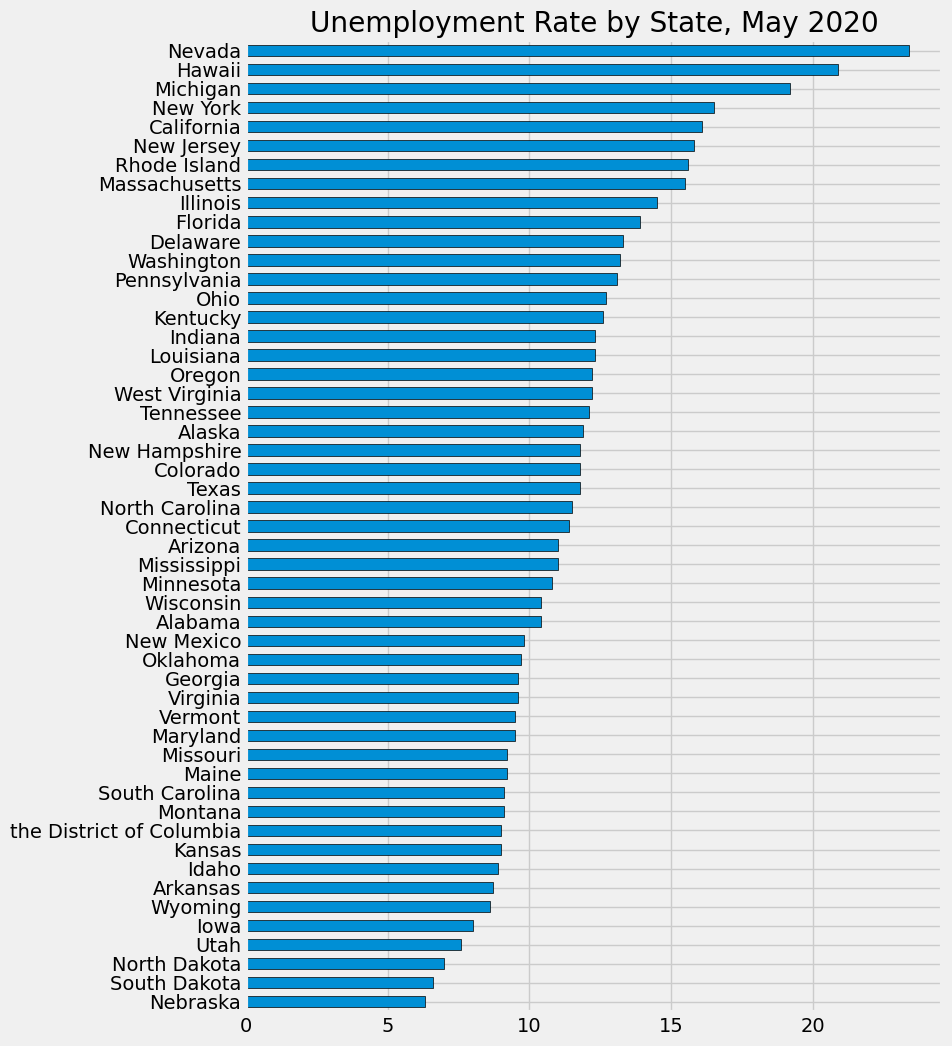

In [7]:
# pull May 2020 UR per State
ax = unemp_states.loc[unemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize=(8, 12), width=0.6, edgecolor='black', \
          title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

In [8]:
# pull participation rate
part_df = fred.search('participation rate state', filter =('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df.loc[part_df['title'].str.contains('Participation Rate for')]
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()

all_results=[]

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
part_states = pd.concat(all_results, axis=1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

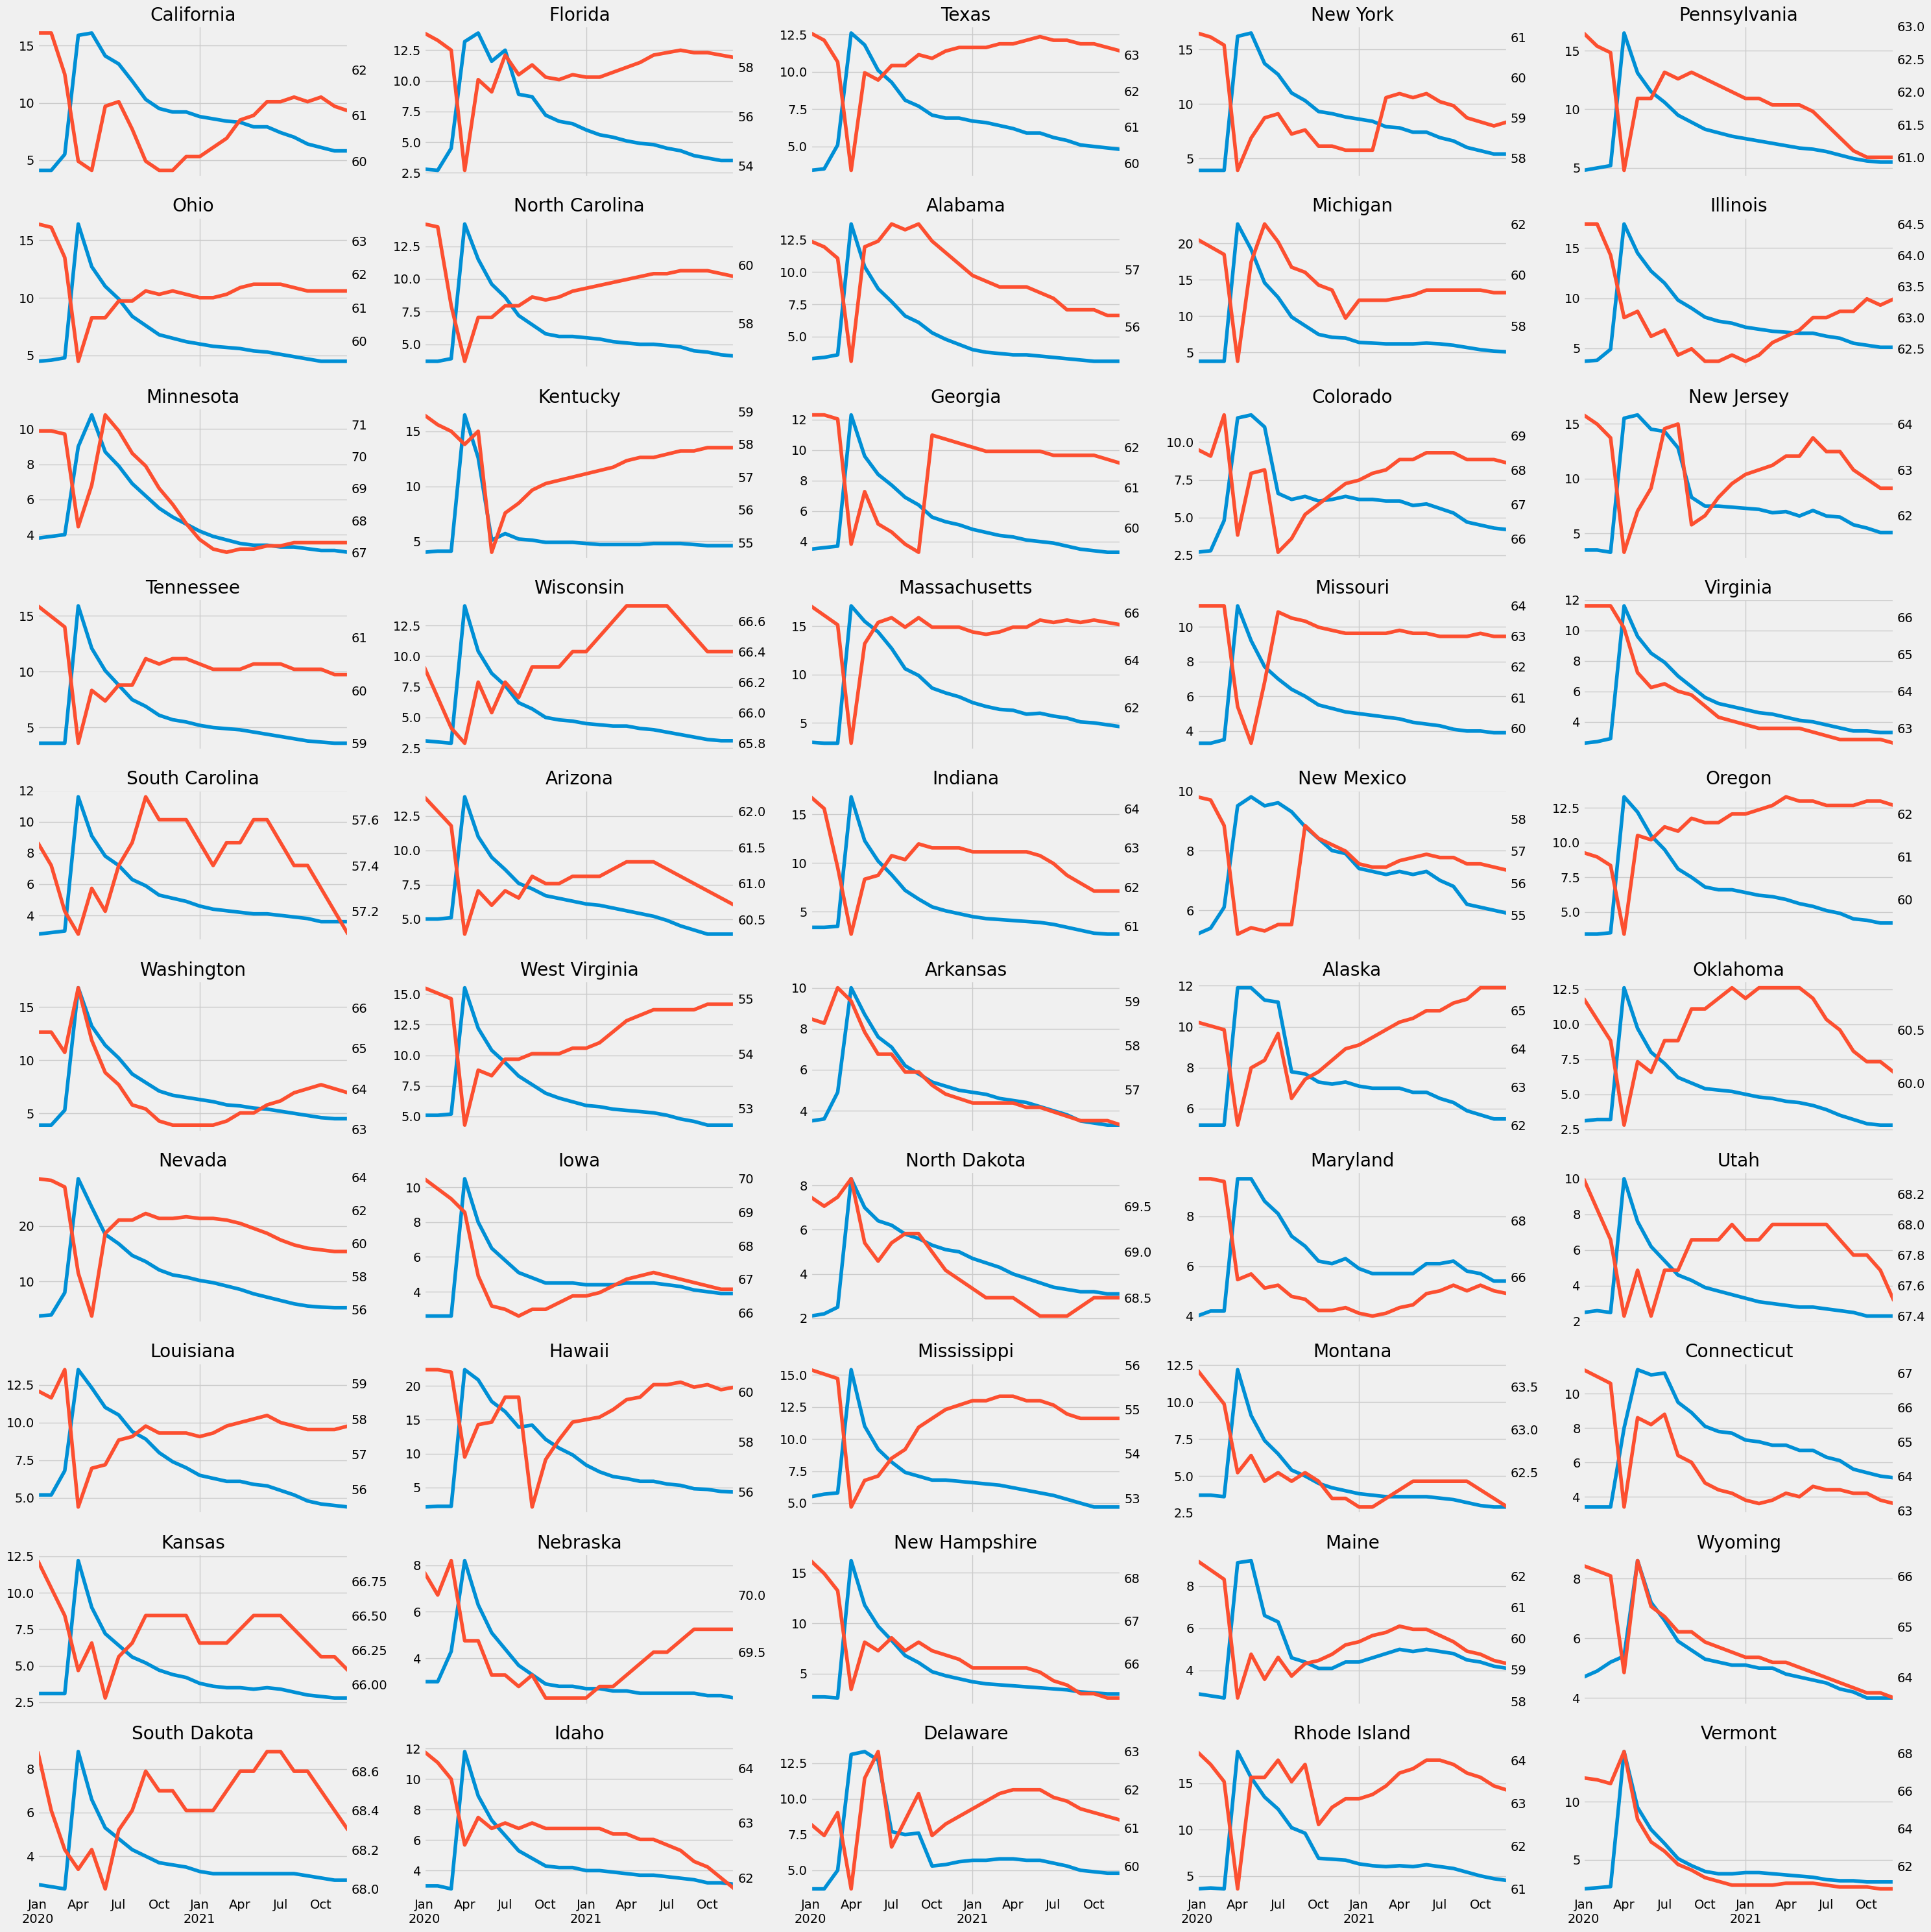

In [15]:
#Fix DC
unemp_states = unemp_states.rename(columns = {'the District of Columbia':'District of Columbia'})

#plot UR vs PR

fig, axs = plt.subplots(10, 5, figsize=(30,30), sharex=True)
axs = axs.flatten()

i=0
for state in unemp_states.columns:
    if state == "District of Columbia":
        continue
    ax2 = axs[i].twinx()
    unemp_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=axs[i], label = 'Unemployment')
    part_states.query('index >= 2020 and index < 2022')[state] \
        .plot(ax=ax2, label = 'Participation', color=color_pal[1])
    ax2.grid(False)
    axs[i].set_title (state)
    i+=1
plt.tight_layout()
plt.show()